In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Nomenclature

$V_{ref}$: the reference wind speed averaged over 10mins at hub height; (determined in code by wind turbine class)

$V_{ave}$: annual average wind speed at hub height; (by code $V_{ave} = 0.2 \times V_{ref}$)

$V_{e50}$: the steady wind extreme wind model, The **extreme wind speed** $V_{e50}$, with a recurrence period of 50 years, as a function of height


$V_{hub}$: wind speed at hub height;

### illustration of the `Normal wind model`


#### the normal wind profile model of height

The wind profile $V(z)$ denotes the average wind speed as a function of heigh, $z$, as given by:

$$
V(z) = V_{hub} (\frac{z}{z_{hub}})^{0.2}
$$

In [37]:
z_hub = 80

In [38]:
z = np.arange(0, z_hub+1, 1)

In [40]:
# *TODO: the equation to determine V_hub
V_hub = 30

In [41]:
V_z = V_hub * (z / z_hub)**0.2

In [42]:
V_z

array([ 0.        , 12.48829811, 14.3452875 , 15.55705934, 16.47840815,
       17.23047532, 17.87036847, 18.42989519, 18.92872033, 19.37991015,
       19.79261866, 20.17352516, 20.52766287, 20.85892525, 21.17039028,
       21.46453622, 21.74338991, 22.00863164, 22.26167091, 22.50370248,
       22.7357485 , 22.95869065, 23.17329517, 23.38023244, 23.58009257,
       23.77339789, 23.96061312, 24.14215368, 24.31839249, 24.48966571,
       24.65627744, 24.81850379, 24.97659622, 25.13078446, 25.28127896,
       25.42827305, 25.57194475, 25.7124584 , 25.84996603, 25.98460855,
       26.1165169 , 26.24581291, 26.37261018, 26.49701481, 26.61912604,
       26.73903687, 26.85683455, 26.97260106, 27.08641354, 27.19834469,
       27.30846305, 27.41683337, 27.52351688, 27.62857152, 27.73205222,
       27.83401104, 27.93449745, 28.03355844, 28.13123871, 28.22758083,
       28.32262534, 28.41641092, 28.50897448, 28.60035127, 28.69057499,
       28.77967787, 28.86769077, 28.95464322, 29.04056355, 29.12

#### the CDF of wind speed distribution

we first try with the Rayleigh distribution whose CDF is given as:

$$
P(V_{0}) = 1 - e^{[ - \pi (V_{0}/2 V_{ave})^2 ]}
$$

In [2]:
v0 = np.linspace(0, 50, 1000)

In [44]:
# the V_{ave} parameter
V_ave = 8.9

In [4]:
cdf = 1 - np.exp(- np.pi * (v0 / (2 * V_ave))**2)

Text(0, 0.5, 'CDF')

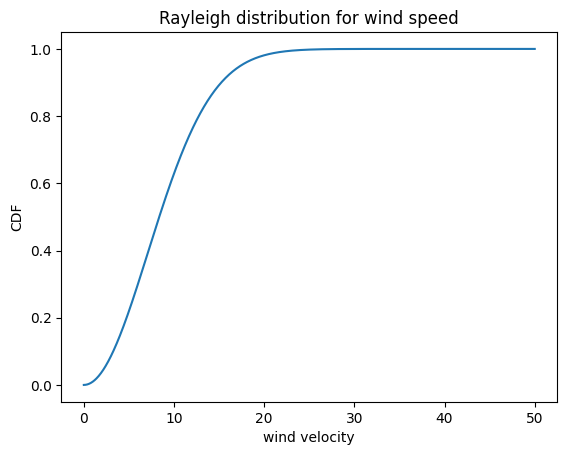

In [49]:
fig, ax = plt.subplots()
ax.plot(v0, cdf)
ax.set_title('Rayleigh distribution for wind speed')
ax.set_xlabel('wind velocity')
ax.set_ylabel('CDF')

In [6]:
cdf.shape

(1000,)

#### sampling

In [9]:
u = np.random.uniform(low=0, high=1, size=10000)

In [10]:
# u is the Uniform random variable
# write down the quantifle function (inverse of cdf)
samples = np.sqrt(- (4 * V_ave**2 / np.pi ) * np.log(1 - u))

In [11]:
samples.shape

(10000,)

(array([ 944., 2198., 2482., 2076., 1272.,  672.,  252.,   80.,   19.,
           5.]),
 array([ 0.09628541,  3.12419452,  6.15210364,  9.18001275, 12.20792186,
        15.23583098, 18.26374009, 21.29164921, 24.31955832, 27.34746743,
        30.37537655]),
 <BarContainer object of 10 artists>)

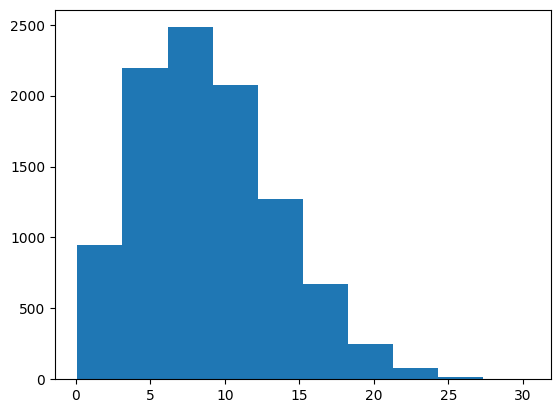

In [12]:
fig, ax = plt.subplots()
ax.hist(samples)

### Illustration of the `Normal turbulence model`

$$
\sigma_{1} = I_{ref} (0.75 V_{hub} + 5.6)
$$

In [15]:
# for class 2A
Iref = 0.16

In [16]:
# example plot
Vhub = np.linspace(0, 30, 100)
sigma1 = Iref * (0.75 * Vhub + 5.6)

Text(0.5, 1.0, 'Turbulence standard deviation for the normal turbulence model')

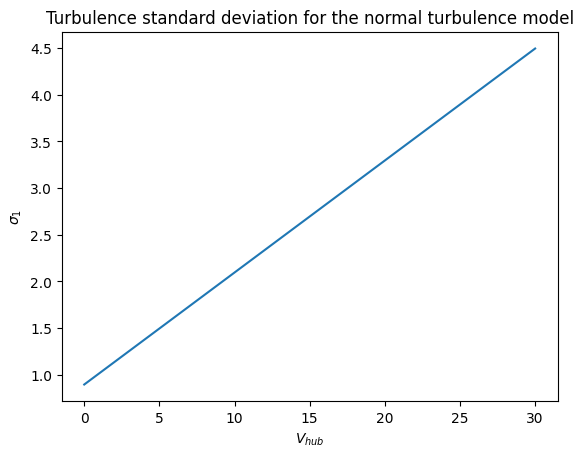

In [21]:
fig, ax = plt.subplots()
ax.plot(Vhub, sigma1)
ax.set_xlabel(r'$V_{hub}$')
ax.set_ylabel(r'$\sigma_{1}$')
ax.set_title('Turbulence standard deviation for the normal turbulence model')

### Illustration of the `Extrme wind speed model`

The Extrme wind speed model shall be either a steady or a turbulent wind model (with the difference of a scaling factor 1.4).
The wind models shall be based on the reference wind speed $V_ref$ and a fixed turbulence standard deviation $\sigma_{1}$. For the steady wind extreme wind model, The **extreme wind speed** $V_{e50}$, with a recurrence period of 50 years, as a function of height $z$, is given by:

$$
V_{e50}(z) = 1.4 V_{ref} (\frac{z}{z_{hub}})^{0.11}
$$

In [23]:
V_ref = 39.5

In [35]:
V_e50_z = 1.4 * V_ref * (z / z_hub)**0.11

In [36]:
V_e50_z

array([ 0.        , 34.14956946, 36.85517963, 38.53617191, 39.77515052,
       40.76354386, 41.58932486, 42.30055029, 42.92646555, 43.48624504,
       43.99316755, 44.45682345, 44.88437372, 45.28131197, 45.65194829,
       45.9997288 , 46.32745371, 46.63743042, 46.93158355, 47.21153585,
       47.47866864, 47.73416777, 47.97905918, 48.21423659, 48.4404835 ,
       48.65849069, 48.86887046, 49.07216815, 49.26887165, 49.45941924,
       49.64420619, 49.82359023, 49.99789617, 50.16741992, 50.33243178,
       50.49317939, 50.64989015, 50.80277348, 50.95202258, 51.09781616,
       51.24031982, 51.37968732, 51.5160617 , 51.64957626, 51.78035543,
       51.90851554, 52.03416553, 52.15740757, 52.27833758, 52.39704578,
       52.5136171 , 52.62813161, 52.74066489, 52.85128833, 52.96006949,
       53.06707233, 53.17235746, 53.27598241, 53.37800181, 53.47846757,
       53.5774291 , 53.67493344, 53.77102542, 53.86574777, 53.95914132,
       54.05124502, 54.14209613, 54.23173029, 54.32018159, 54.40

### Illustration of the `Extrme turbulence model`

The extreme turbulence model shall use **the normal wind profile model** and turbulence with longitudinal component std given by:

$$
\sigma_{1} = c \times I_{ref} \Bigg[ 0.072(\frac{V_{ave}}{c} + 3) (\frac{V_{hub}}{c} - 4) + 10  \Bigg]
$$

where $c=2$

In [46]:
c=2

In [47]:
sigma_1_extreme = 2 * Iref * (0.072 * (V_ave/c + 3) * (V_hub/c -4) + 10)

In [48]:
sigma_1_extreme

5.088128

### Illustration of the parametrisation of $V_{hub}$

$$
V_{10} = V_{hh} \times \frac{\ln(10/0.05)}{\ln ({hh/0.05})}   
$$


# questions

- [ ] how to determine $V_{hub}$

## other stuff


tips:

We have 11 nodes with wind speed calculated, therefore, we need 12 area and height for computing delta height

In [1]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [6]:
# plus 1 at the end

area_com = np.array([0.496861728, 0.295312851, 0.282306657, 0.269300464, 0.25629427, 0.243288077, 0.229559317, 0.216553123, 0.20354693, 0.190540736, 0.177534542, 0.177534542])

In [8]:
area_com.shape

(12,)

In [10]:
# plus one height of the hub

heighs_com = np.array([42.55, 45.434, 48.318, 51.202, 54.086, 56.97, 59.854, 62.738, 65.622, 68.506, 71.39, 75.3])

In [11]:
heighs_com.shape

(12,)

In [12]:
delta_h = moving_average(heighs_com, 2)

In [13]:
delta_h

array([43.992, 46.876, 49.76 , 52.644, 55.528, 58.412, 61.296, 64.18 ,
       67.064, 69.948, 73.345])